In [35]:
import torch 
import pandas as pd
from PIL import Image 
from os import listdir
from os.path import isfile, join
import torchvision.transforms as transforms 
import pandas as pd
import matplotlib.pyplot as plt
import math
import config

In [36]:
s = config.get_s()
train_dataset = torch.load(f"../datasets/train{s}.pt")
test_dataset = torch.load(f"../datasets/test{s}.pt")
result_dataset = torch.load(f"../datasets/predict{s}.pt")
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=False)
train_dataloader_1 = torch.utils.data.DataLoader(train_dataset)
train_dataloader_out = torch.utils.data.DataLoader(train_dataset, batch_size= len(train_dataset))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_dataloader_1 = torch.utils.data.DataLoader(test_dataset)
test_dataloader_out = torch.utils.data.DataLoader(test_dataset, batch_size= len(test_dataset))
result_dataloader_1 = torch.utils.data.DataLoader(result_dataset)

In [37]:
len(train_dataset)+len(test_dataset)

35980

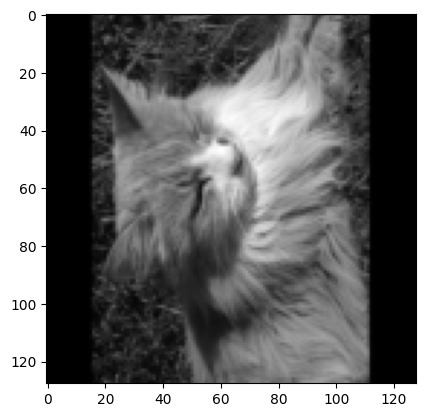

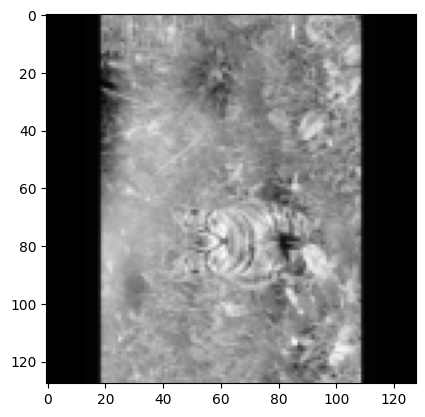

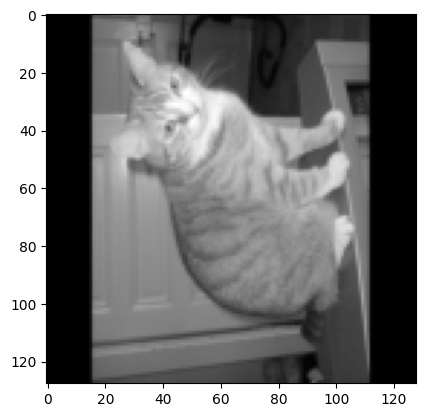

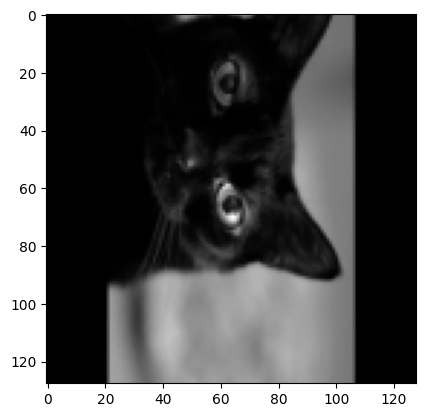

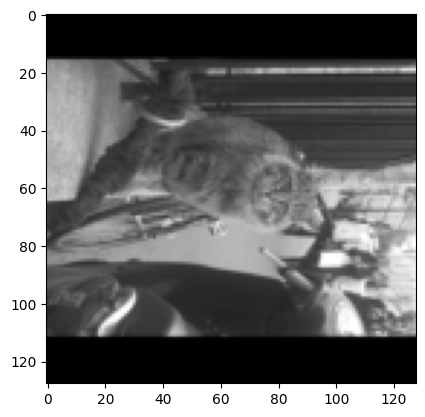

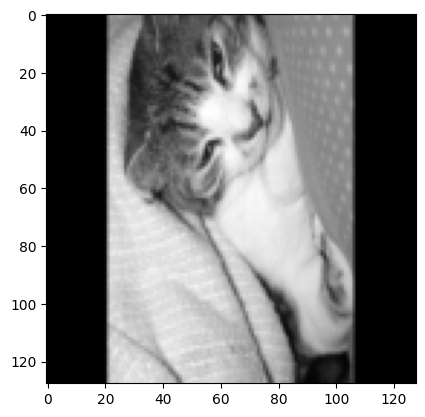

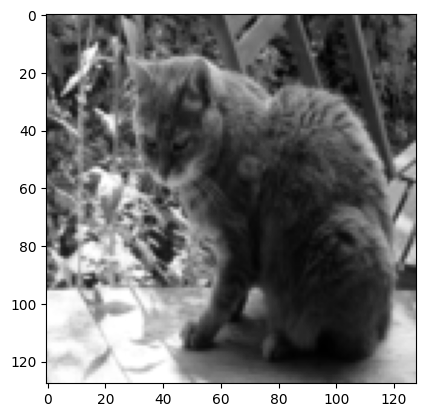

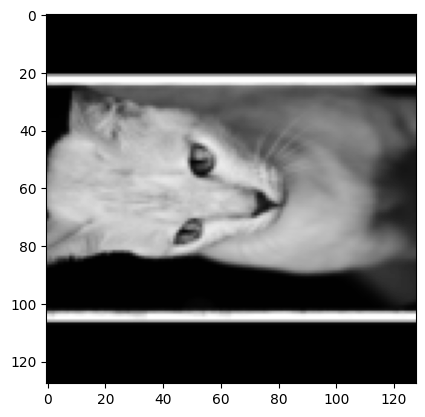

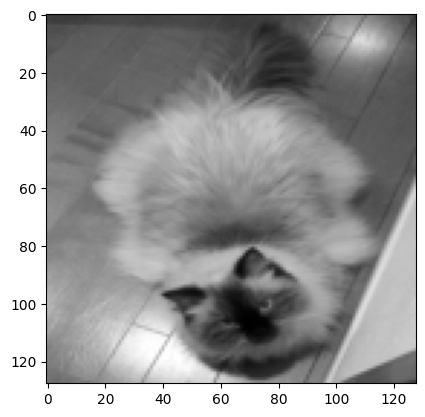

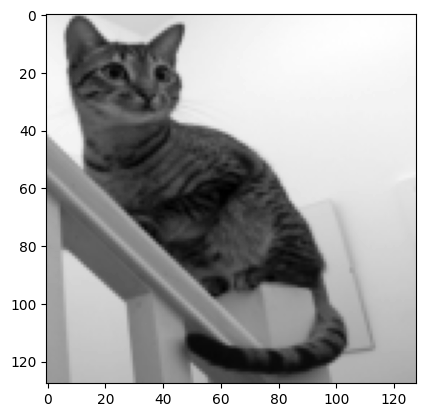

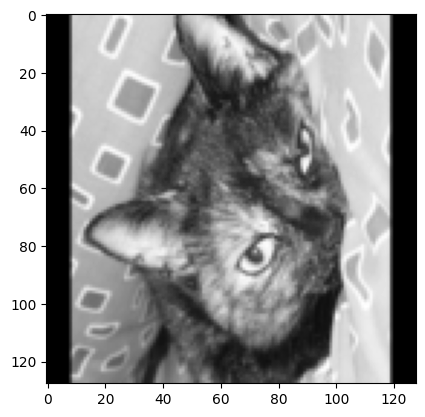

In [5]:
count = 10
i = 0
for x, y in train_dataloader_1:
    #print(x)
    #print(y)
    plt.imshow(x[0].permute(1,2,0), cmap = 'gray')
    plt.show()
    i += 1
    if i > count:
        break

In [24]:
def rotate(x, y, center, angle):
    ang_rad = math.radians(angle)
    new_x = (x - center[0])*math.cos(ang_rad) - (y - center[1])*math.sin(ang_rad) + center[0]
    new_y = (x - center[0])*math.sin(ang_rad) + (y  - center[1])*math.cos(ang_rad) + center[1]
    return new_x, new_y

def resize(x, y, width, height):
    new_x = x*(config.size/width)
    new_y = y*(config.size/height)
    return new_x, new_y

In [29]:
train_csv = pd.read_csv("../train_labels.csv")

path = '../images/images/train/'

train_features = []
train_targets = []

transform = transforms.Compose([ 
    transforms.Resize((config.size, config.size)),
    transforms.PILToTensor(),
]) 

if config.grayscale:
    transform = transforms.Compose([transforms.Grayscale(), transform])

rotation_angles = [0, 90, 180, 270]

if config.rotate == False:
    rotation_angles = [0]

for file in listdir(path):
    filename = join(path, file)
    if isfile(filename):
        image = Image.open(filename)
        width, height = image.size
        for angle in rotation_angles:
            img = image.rotate(360-angle)
            img_tensor = transform(img).type(torch.FloatTensor) 
            train_features.append(img_tensor)
            train_targets.append(train_csv.loc[train_csv['file_name'] == file].drop('file_name', axis = 1).values[0])
            for i in range(0, len(train_targets[-1]),2):
                center = (width / 2, height/2) 
                x, y = train_targets[-1][i], train_targets[-1][i+1]
                x, y =  rotate(x, y, center, angle)
                train_targets[-1][i], train_targets[-1][i+1] = resize(x, y, width, height)
                
        break

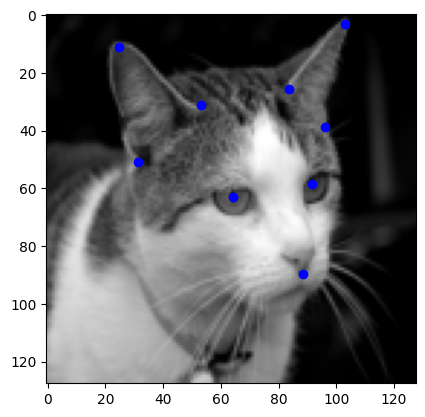

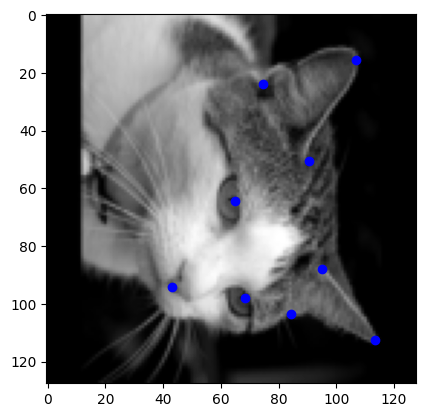

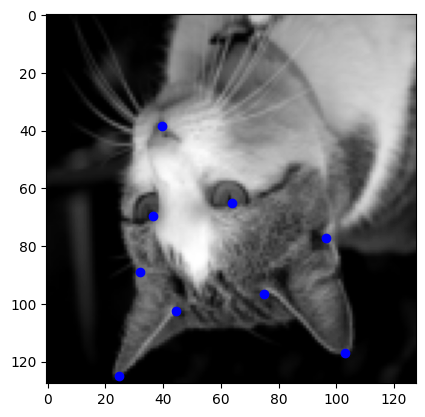

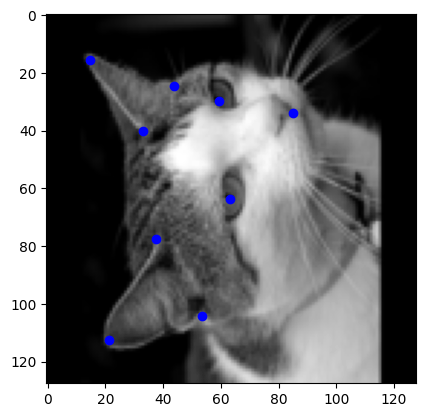

In [30]:
for i in range(len(train_features)):
    im = train_features[i]
    draw_points = train_targets[i]
    plt.imshow(im.permute(1,2,0), cmap = 'gray')
    for j in range(0, len(draw_points),2):
                    x, y = draw_points[j], draw_points[j+1] 
                    plt.plot(x,y, 'bo')
    plt.show()